<a href="https://colab.research.google.com/github/mathuscm/Criptomoedas-m5/blob/main/Projeto_Cryptomoedas_5_Qual_Criptomoeda_se_mostra_MAIS_interessante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. Qual Criptomoeda se mostra MAIS interessante em relação à valorização pela análise da série histórica?

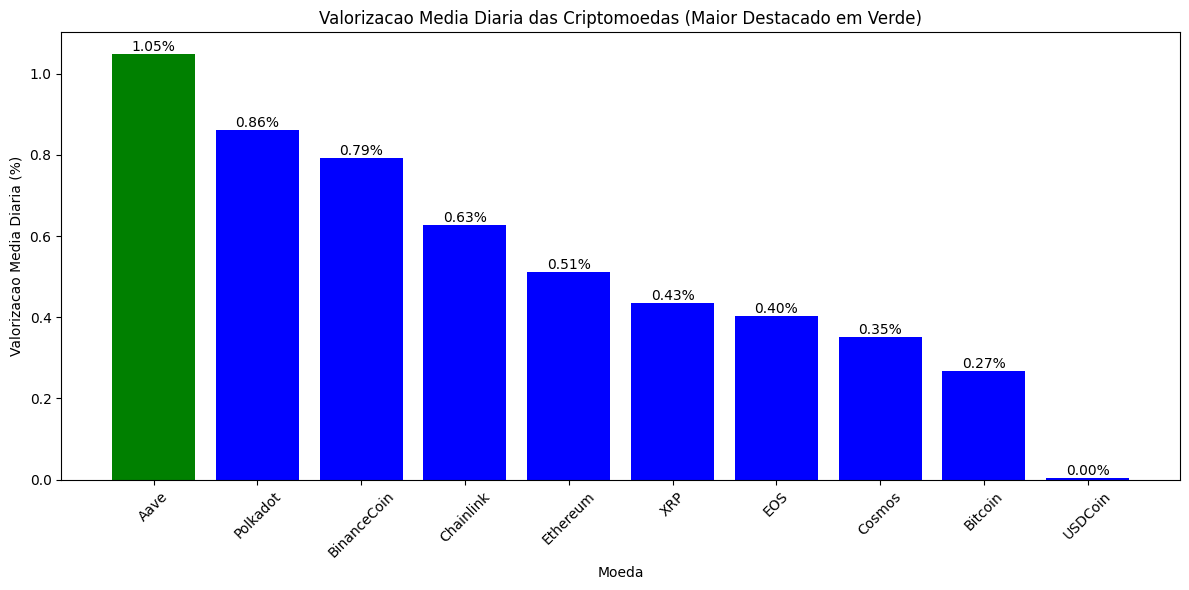

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Dicionário para armazenar os DataFrames de cada moeda
moedas = {
    'Aave': 'https://raw.githubusercontent.com/mathuscm/Criptomoedas-m5/main/ArquivosCrypto/coin_Aave.csv',
    'BinanceCoin': 'https://raw.githubusercontent.com/mathuscm/Criptomoedas-m5/main/ArquivosCrypto/coin_BinanceCoin.csv',
    'Bitcoin': 'https://raw.githubusercontent.com/mathuscm/Criptomoedas-m5/main/ArquivosCrypto/coin_Bitcoin.csv',
    'Chainlink': 'https://raw.githubusercontent.com/mathuscm/Criptomoedas-m5/main/ArquivosCrypto/coin_ChainLink.csv',
    'Cosmos': 'https://raw.githubusercontent.com/mathuscm/Criptomoedas-m5/main/ArquivosCrypto/coin_Cosmos.csv',
    'EOS': 'https://raw.githubusercontent.com/mathuscm/Criptomoedas-m5/main/ArquivosCrypto/coin_EOS.csv',
    'Ethereum': 'https://raw.githubusercontent.com/mathuscm/Criptomoedas-m5/main/ArquivosCrypto/coin_Ethereum.csv',
    'Polkadot': 'https://raw.githubusercontent.com/mathuscm/Criptomoedas-m5/main/ArquivosCrypto/coin_Polkadot.csv',
    'USDCoin': 'https://raw.githubusercontent.com/mathuscm/Criptomoedas-m5/main/ArquivosCrypto/coin_USDCoin.csv',
    'XRP': 'https://raw.githubusercontent.com/mathuscm/Criptomoedas-m5/main/ArquivosCrypto/coin_XRP.csv'
}

# Cálculo da tendência de valorização média para cada moeda
valorizacao_media = {}

for moeda, url in moedas.items():
    df = pd.read_csv(url)
    df['Valorizacao Diaria (%)'] = ((df['Close'] - df['Open']) / df['Open']) * 100
    valorizacao_media[moeda] = df['Valorizacao Diaria (%)'].mean()

# Encontrando a moeda com a maior valorização média
moeda_mais_valorizada = max(valorizacao_media, key=valorizacao_media.get)
valor_mais_alto = valorizacao_media[moeda_mais_valorizada]

# Ordenei as moedas do maior para o menor valor médio
moedas_ordenadas = sorted(valorizacao_media.keys(), key=lambda x: valorizacao_media[x], reverse=True)
valores_ordenados = [valorizacao_media[moeda] for moeda in moedas_ordenadas]

# Defini cores, destacando a cor verde para a moeda com maior valorização média
cores = ['green' if moeda == moeda_mais_valorizada else 'blue' for moeda in moedas_ordenadas]

# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(moedas_ordenadas, valores_ordenados, color=cores)

# Adicionei um texto destacando o valor acima de cada barra para melhor compreensão
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', (bar.get_x() + bar.get_width() / 2, height),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Moeda')
plt.ylabel('Valorizacao Media Diaria (%)')
plt.title('Valorizacao Media Diaria das Criptomoedas (Maior Destacado em Verde)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()